# Objective

Your dataset for this drill contains daily closing prices for the SPDR S&P 500 ETF Trust (SPY) over the last 5 years.

Your task is to calculate the 50-day and 200-day moving averages based on the closing price, and identify every “Golden Cross” moment – when the short-term average (50-day) crosses from below to above the long-term average (200-day) – signaling a potential bull market.

To complete the drill, create a table containing the date, close price, and three new columns:

- 50-day moving average: The average closing price for the last 50 trading days, calculated for each date

- 200-day moving average: The average closing price for the last 200 trading days, calculated for each date

- Golden Cross: A binary field (1/0) that equals 1 only on the exact date when the 50-day average crosses from below the 200-day average; otherwise 0

# Imports

In [27]:
import pandas as pd
df = pd.read_csv('SPY_close_price_5Y.csv')

# Solution

### Data exploration

In [28]:
# Check for data types and missed values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1256 non-null   object 
 1   Close   1256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [29]:
# Look at the data
df.head()

,Date,Close
0,2020-11-02,330.20
1,2020-11-03,336.03
2,2020-11-04,343.54
3,2020-11-05,350.24
4,2020-11-06,350.16


In [30]:
# Remove duplicates and check that all dates are consecutive

df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True) # sort by date

df['Date_diff'] = df['Date'].diff().dt.days # difference from the previous entry in days 
df.Date_diff = df.Date_diff.fillna(0).astype('int')
df.Date_diff.value_counts()

Date_diff
1    983
3    223
4     37
2     12
0      1
Name: count, dtype: int64

In [31]:
df['Weekday'] = df['Date'].dt.day_name()
after_gap3 = df.Date_diff == 3
df[after_gap3].Weekday.value_counts()

Weekday
Monday    223
Name: count, dtype: int64

Gaps in the data are likely explained by holidays. Do the 50- and 200-day intervals correspond to calendar days or working days? Let's assume they are counted in working days.

### Moving averages calculation

<Axes: >

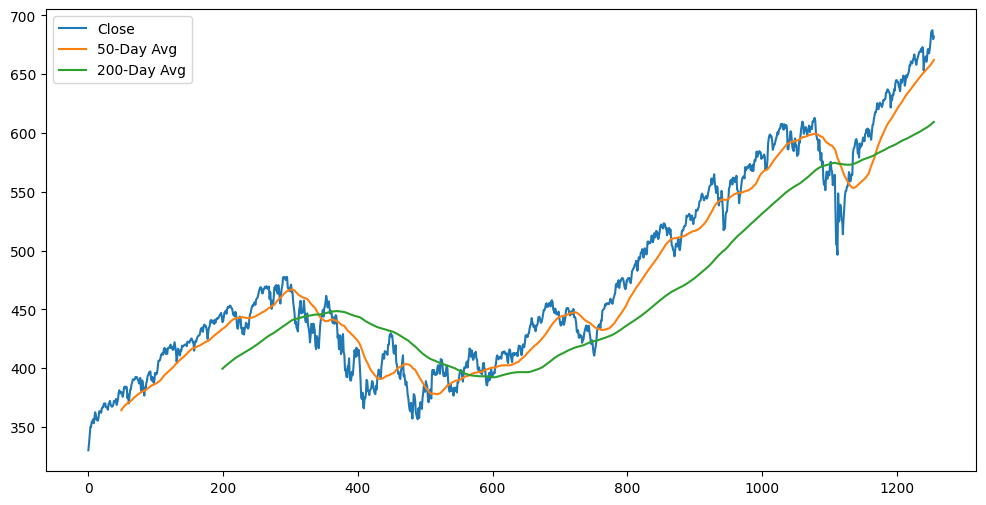

In [32]:
# Discard accessory columns
df.drop(columns=['Date_diff', 'Weekday'], inplace=True)

# Calculate moving averages and plot
df['50-Day Avg'] = df.Close.rolling(window=50).mean()
df['200-Day Avg'] = df.Close.rolling(window=200).mean()
df[['Close', '50-Day Avg', '200-Day Avg']].plot(figsize=(12,6))

In [33]:
# Compare two averages for each date
df['50_above_200'] = df['50-Day Avg'] > df['200-Day Avg']
df['50_above_200'] = df['50_above_200'].astype('int')
df.iloc[330:351]

,Date,Close,50-Day Avg,200-Day Avg,50_above_200
330,2022-02-24,428.30,455.0050,444.82625,1
331,2022-02-25,437.75,454.4928,444.98795,1
332,2022-02-28,436.63,453.8134,445.11970,1
333,2022-03-01,429.98,453.0840,445.18670,1
334,2022-03-02,437.89,452.6444,445.29855,1
335,2022-03-03,435.71,452.2590,445.41740,1
336,2022-03-04,432.17,451.6412,445.52395,1
337,2022-03-07,419.43,450.6760,445.54470,1
338,2022-03-08,416.25,449.5890,445.55125,1
339,2022-03-09,427.41,448.5920,445.59245,1


In [34]:
# Golden cross points are where 50_above_200 turns from 0 to 1

golden_cross_mask = df['50_above_200'] > df['50_above_200'].shift(periods=1)

# Create the Golden Cross column and fill it with zeroes
df['Golden Cross'] = 0

# Mark golden cross points with 1
df.loc[golden_cross_mask, 'Golden Cross'] = 1

# Valid golden cross can appear only after day 200
df.loc[0:201, 'Golden Cross'] = 0

# Discard accessory column
df.drop(columns=['50_above_200'], inplace=True)


### Display all the Golden Cross points

In [35]:
df[df['Golden Cross'] == 1]

,Date,Close,50-Day Avg,200-Day Avg,Golden Cross
566,2023-02-02,416.78,394.3504,394.25025,1
1169,2025-07-01,617.65,583.0978,582.04155,1


In [36]:
# Check that our calculations are correct
df.iloc[1160:1175]

,Date,Close,50-Day Avg,200-Day Avg,Golden Cross
1160,2025-06-17,597.53,568.4728,579.52455,0
1161,2025-06-18,597.44,570.3340,579.72000,0
1162,2025-06-20,594.28,572.2900,579.87300,0
1163,2025-06-23,600.15,573.3206,580.11335,0
1164,2025-06-24,606.78,574.9646,580.39250,0
1165,2025-06-25,607.12,576.4282,580.68005,0
1166,2025-06-26,611.87,577.8832,581.03760,0
1167,2025-06-27,614.91,579.4292,581.38010,0
1168,2025-06-30,617.85,581.2730,581.72540,0
1169,2025-07-01,617.65,583.0978,582.04155,1


# Done! :)